#### **CS673 Midterm Project**
#### **Ray Jennings and Marwan Shourey**
#### **10/29/2021**

<br>

### **Show datasets to compare the effects of global warming**
#### Select two choices from the selectors and show the world data for each dataset

<br>

In [1]:
import os
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

     Entity         Day  temperature_anomaly
3402  World  1880-01-15                -0.17
3403  World  1880-02-15                -0.23
3404  World  1880-03-15                -0.08
3405  World  1880-04-15                -0.15
3406  World  1880-05-15                -0.09





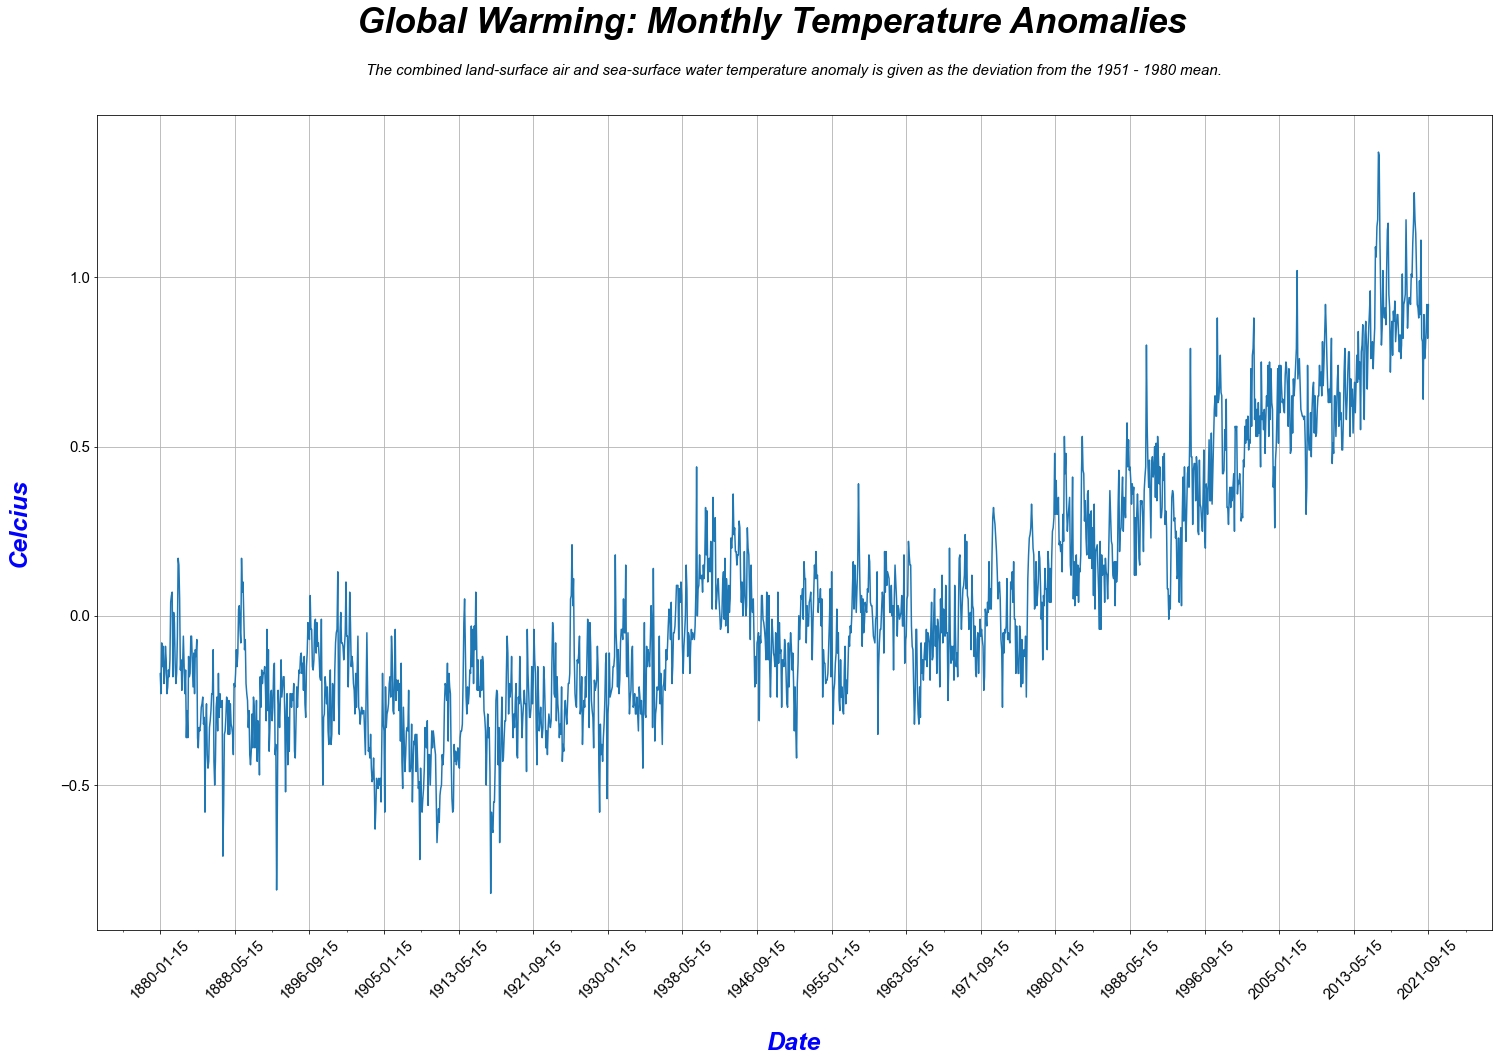

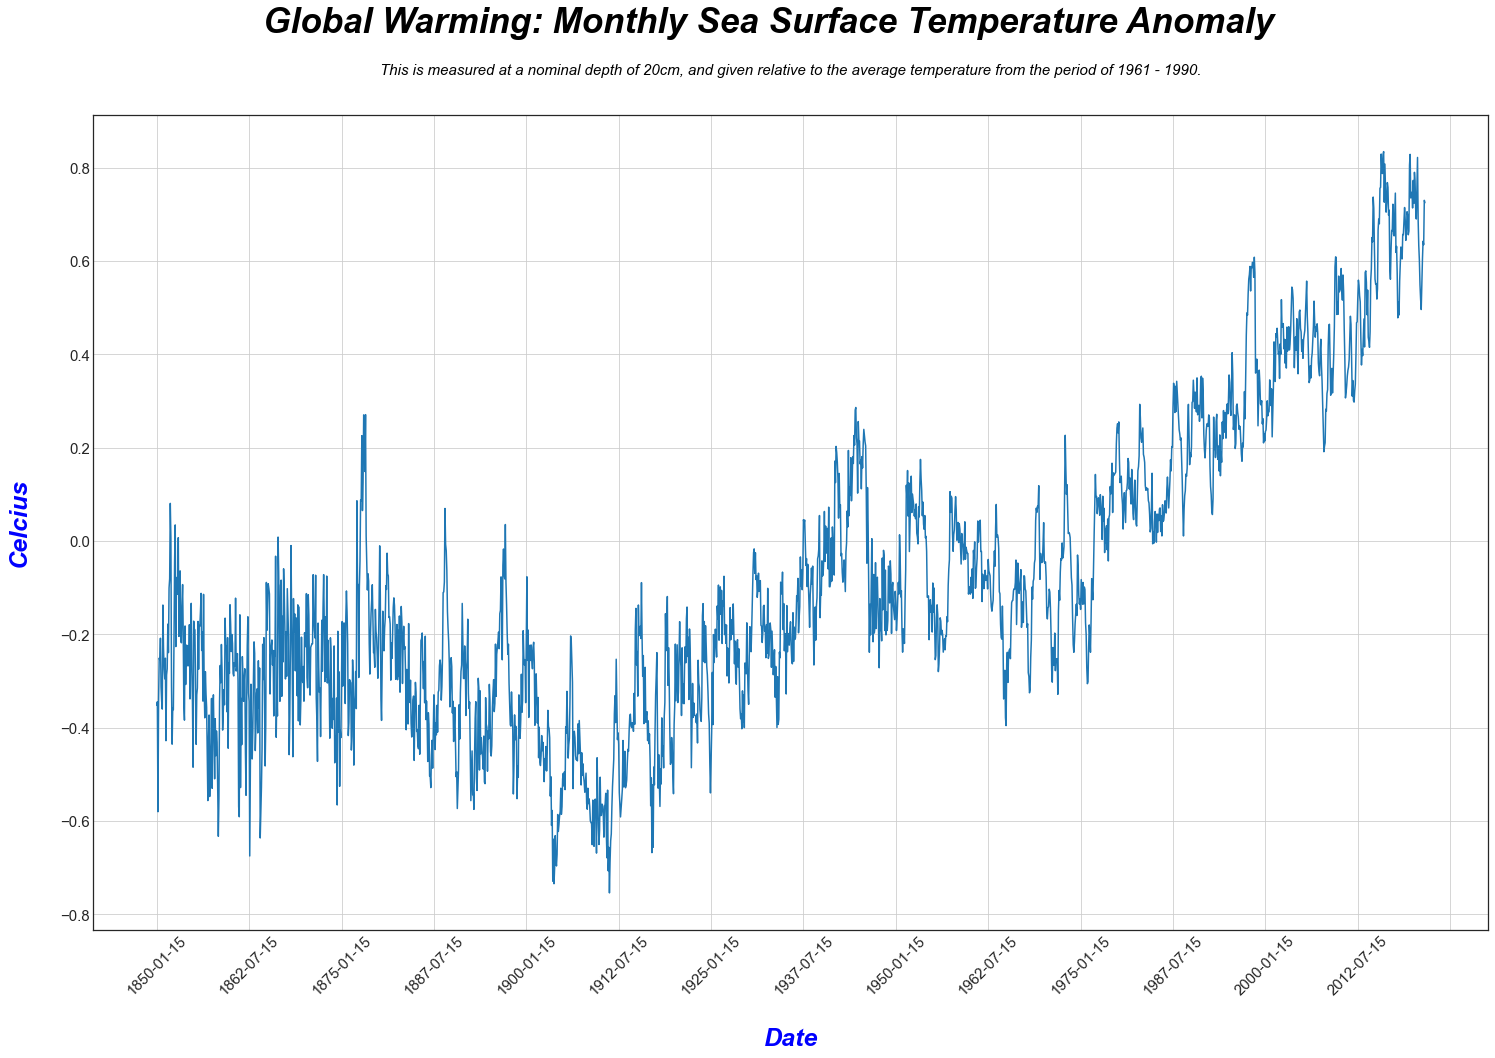

In [2]:
#
# Opening graph
# Global warming: monthly temperature anomaly
# The combined land-surface air and sea-surface water temperature anomaly is given as the deviation from the 1951 - 1980 mean.
# Source: https://ourworldindata.org/explorers/climate-change?facet=none&country=~OWID_WRL&Metric=Temperature+anomaly&Long-run+series%3F=false
#

#
# Second graph:
# Global warming: monthly sea surface temperature anomaly
# This is measured at a nominal depth of 20cm, and given relative to the average temperature from the period of 1961 - 1990.
# Source: https://ourworldindata.org/explorers/climate-change?facet=none&country=~OWID_WRL&Metric=Sea+surface+temperature+anomaly&Long-run+series%3F=false
#

json_data = pd.read_json('./data/air-temperature.json')
world_df = json_data.loc[(json_data['Entity'] == "World")]
world_df.drop(columns=['Code'], inplace=True)
print(world_df.head())

print("\n\n")

fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_facecolor("white")
plt.style.use('seaborn-white')
plt.plot(world_df['Day'], world_df['temperature_anomaly'])

plt.suptitle('Global Warming: Monthly Temperature Anomalies', fontsize=35, weight='bold', style='italic', color='black')
plt.title('The combined land-surface air and sea-surface water temperature anomaly is given as the deviation from the 1951 - 1980 mean.', fontsize=15, weight='normal', style='italic', color='black', pad=40)

plt.xlabel('Date', fontsize=25, weight='bold', style='italic', color='blue', labelpad=30)
plt.ylabel('Celcius', fontsize=25, weight='bold', style='italic', color='blue', labelpad=30)

plt.xticks(rotation=45, fontsize=15)
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
plt.yticks(fontsize=15)
plt.grid(True)
# plt.savefig("./Figure1.png")
plt.show();

print("\n\n")




json_data = pd.read_json('./data/sea-surface.json')
world_df = json_data.loc[(json_data['Entity'] == "World")]
world_df.drop(columns=['Code'], inplace=True)

print("\n\n")


#with plt.style.context('seaborn-white'):
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_facecolor("white")
plt.plot(world_df['Day'], world_df['monthly_sea_surface_temperature_anomaly'])

plt.suptitle('Global Warming: Monthly Sea Surface Temperature Anomaly', fontsize=35, weight='bold', style='italic', color='black')
plt.title('This is measured at a nominal depth of 20cm, and given relative to the average temperature from the period of 1961 - 1990.', fontsize=15, weight='normal', style='italic', color='black', pad=40)

plt.xlabel('Date', fontsize=25, weight='bold', style='italic', color='blue', labelpad=30)
plt.ylabel('Celcius', fontsize=25, weight='bold', style='italic', color='blue', labelpad=30)

plt.xticks(rotation=45, fontsize=15)
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
plt.yticks(fontsize=15)
plt.grid(True)

# plt.savefig("./Figure2.png")
plt.show();


print("\n\n")

In [3]:
def load_file(file_name):
    """
    Load the csv file and convert to dataframe
    """
    try:
        file_data = pd.read_csv(file_name, low_memory=False)
        file_df = pd.DataFrame(file_data)
        
        return file_df
    
    except FileNotFoundError as e:
        print("Error: Unable to open file: " + str(e.filename))


def get_local_path():
    """
    Return the local path of the data files
    """
    return './data/'

### **Show Box Plots for decade years for each dataset**

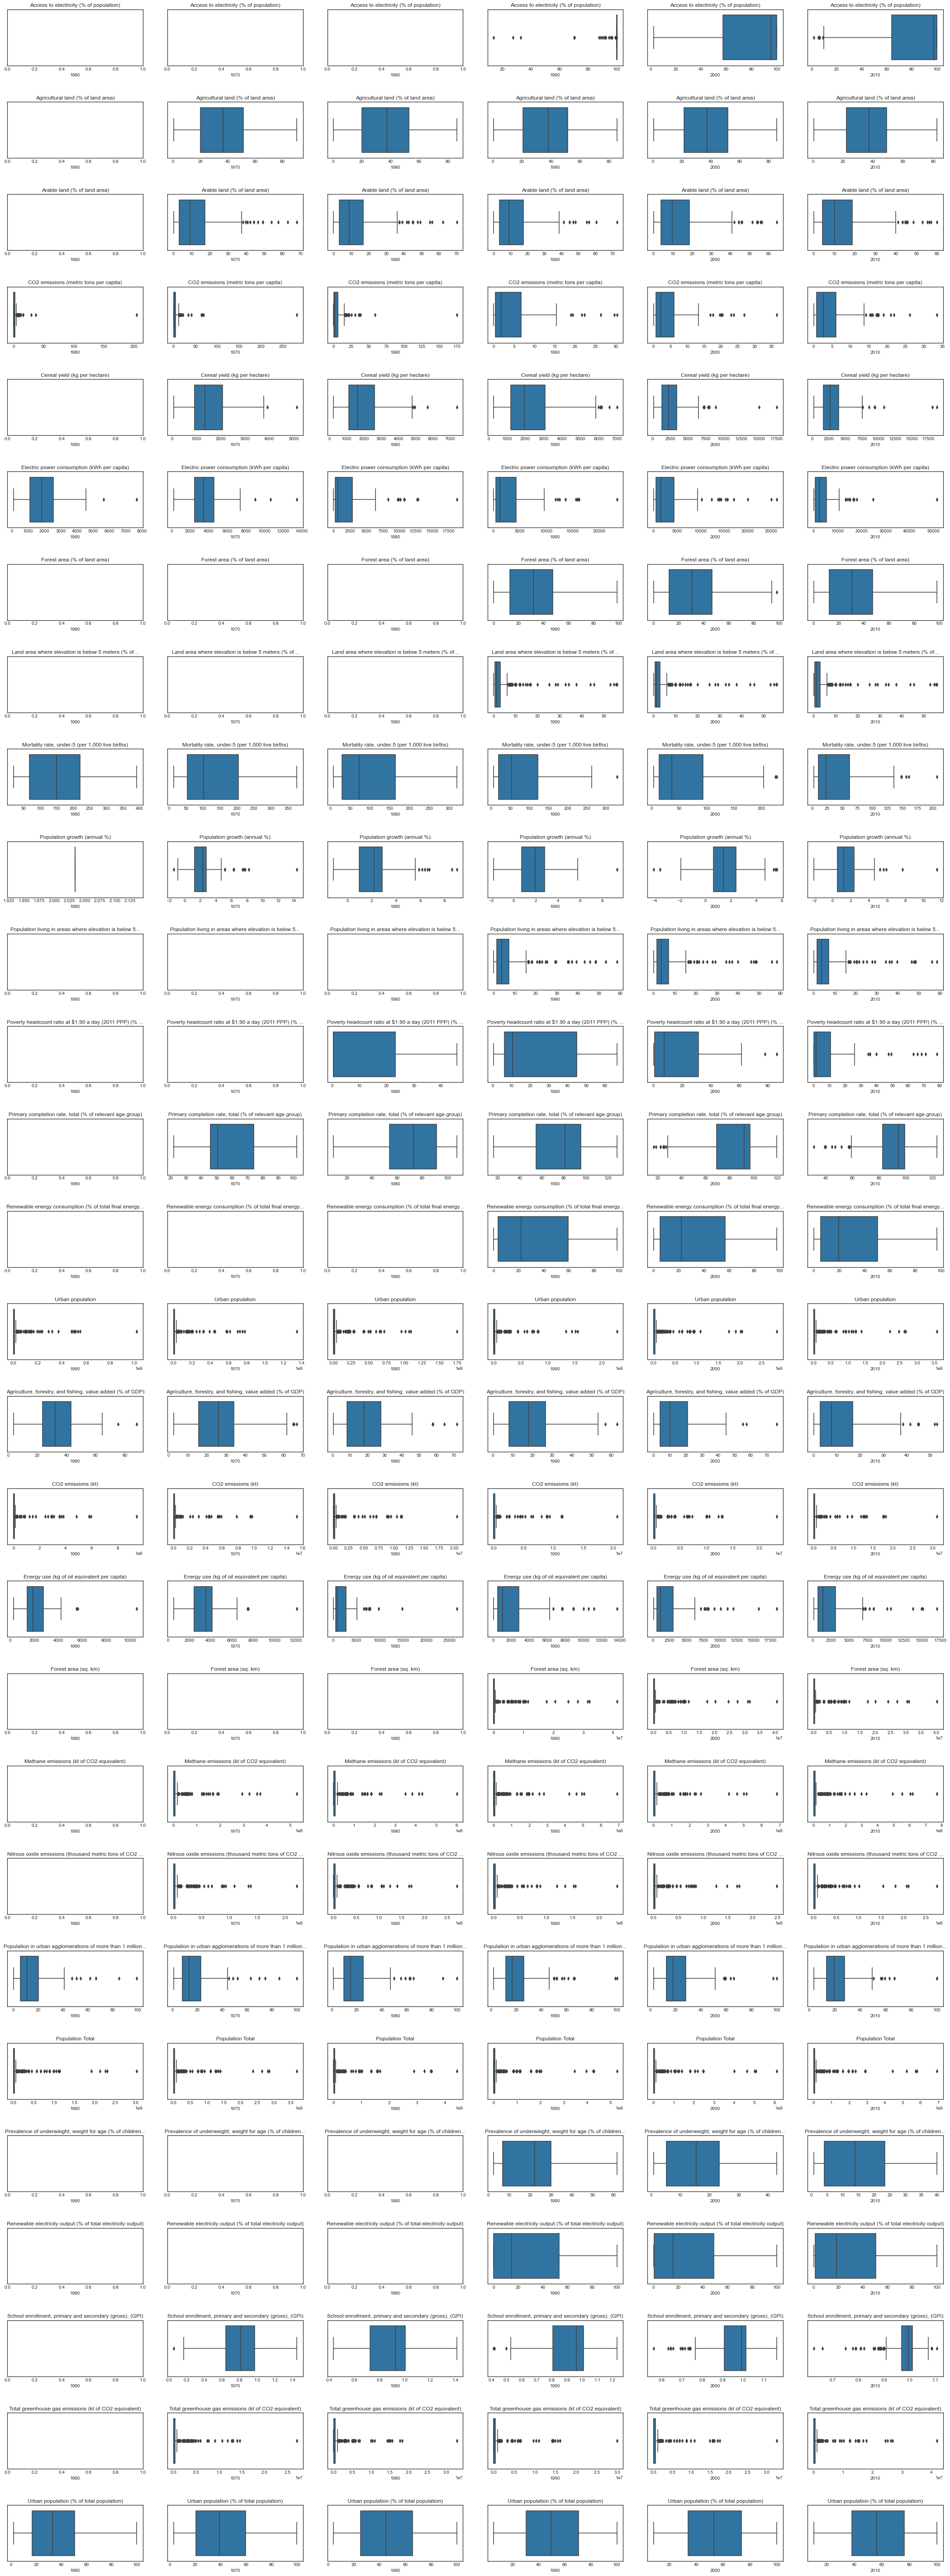

In [4]:
def show_box_plots():
    """
    Show each decade year box plot for each dataset
    """

    files = [
        'API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_3053855.csv',
        'API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3052884.csv',
        'API_AG.LND.ARBL.ZS_DS2_en_csv_v2_3054826.csv',
        'API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3053008.csv',
        'API_AG.YLD.CREL.KG_DS2_en_csv_v2_3053734.csv',
        'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3052822.csv',
        'API_AG.LND.FRST.ZS_DS2_en_csv_v2_3052585.csv',
        'API_AG.LND.EL5M.ZS_DS2_en_csv_v2_3057029.csv',
        'API_SH.DYN.MORT_DS2_en_csv_v2_3058030.csv',
        'API_SP.POP.GROW_DS2_en_csv_v2_3052790.csv',
        'API_EN.POP.EL5M.ZS_DS2_en_csv_v2_3057452.csv',
        'API_SI.POV.DDAY_DS2_en_csv_v2_3055766.csv',
        'API_SE.PRM.CMPT.ZS_DS2_en_csv_v2_3053767.csv',
        'API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3053509.csv',
        'API_SP.URB.TOTL_DS2_en_csv_v2_3058363.csv',
        'API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_3052981.csv',
        'API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3052647.csv',
        'API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_3052915.csv',
        'API_AG.LND.FRST.K2_DS2_en_csv_v2_3054052.csv',
        'API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3052859.csv',
        'API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_3054894.csv',
        'API_EN.URB.MCTY.TL.ZS_DS2_en_csv_v2_3053950.csv',
        'API_SP.POP.TOTL_DS2_en_csv_v2_3052518.csv',
        'API_SH.STA.MALN.ZS_DS2_en_csv_v2_3058087.csv',
        'API_EG.ELC.RNEW.ZS_DS2_en_csv_v2_3054878.csv',
        'API_SE.ENR.PRSC.FM.ZS_DS2_en_csv_v2_3057870.csv',   
        'API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_3052850.csv',
        'API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_3053985.csv'
    ]
    
    title = [
        'Access to electricity (% of population)',
        'Agricultural land (% of land area)',
        'Arable land (% of land area)',
        'CO2 emissions (metric tons per capita)',
        'Cereal yield (kg per hectare)',
        'Electric power consumption (kWh per capita)',
        'Forest area (% of land area)',
        'Land area where elevation is below 5 meters (% of...',
        'Mortality rate, under-5 (per 1,000 live births)',
        'Population growth (annual %)',
        'Population living in areas where elevation is below 5...',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% ...',
        'Primary completion rate, total (% of relevant age group)',
        'Renewable energy consumption (% of total final energy...',
        'Urban population',
        'Agriculture, forestry, and fishing, value added (% of GDP)',
        'CO2 emissions (kt)',
        'Energy use (kg of oil equivalent per capita)',
        'Forest area (sq. km)',
        'Methane emissions (kt of CO2 equivalent)',
        'Nitrous oxide emissions (thousand metric tons of CO2 ...',
        'Population in urban agglomerations of more than 1 million...',
        'Population Total',
        'Prevalence of underweight, weight for age (% of children...',
        'Renewable electricity output (% of total electricity output)',
        'School enrollment, primary and secondary (gross), (GPI)',  
        'Total greenhouse gas emissions (kt of CO2 equivalent)',
        'Urban population (% of total population)'        
    ]
    
    y = ['1960', '1970', '1980', '1990', '2000', '2010']
    
    title_size = 8
    f, axs = plt.subplots(len(files), 6, figsize=(30, 80), constrained_layout=True);
    # plt.figure(figsize=(200, 400));
    # f.suptitle('Box Plots') # or plt.suptitle('Box Plots');
    sns.set_style("whitegrid", {'axes.grid' : False});
    
    for r in range(len(files)):
        df = load_file(get_local_path() + files[r])
        for x in range(6):
            axs[r, x].set_title(title[r])
            sns.boxplot(df[y[x]], ax=axs[r,x], orient='horizontal')

    f.tight_layout(pad=4.0);
    # f.suptitle('Box Plots') # or plt.suptitle('Box Plots')
    plt.show();


show_box_plots()

In [5]:
#
# Get a copy of the geopandas world map
# Update the missing country code values as specified in the github bug
#

world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Add github fix
world_df.loc[world_df['name'] == 'France', 'iso_a3'] = 'FRA'
world_df.loc[world_df['name'] == 'Norway', 'iso_a3'] = 'NOR'
world_df.loc[world_df['name'] == 'N. Cyprus', 'iso_a3'] = 'CYP'
world_df.loc[world_df['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world_df.loc[world_df['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

In [6]:
def get_blank_world_geopanda_frame():
    """
    Make a copy of the world geopandas dataframe
    Create the columns to be filled in
    """
    df = world_df.copy()
    df['1960'] = 0.0
    df['1970'] = 0.0
    df['1980'] = 0.0
    df['1990'] = 0.0
    df['2000'] = 0.0
    df['2010'] = 0.0
    
    return df

In [7]:
def update_df(row, **kwargs):
    """
    Pandas apply method
    
    Update a geopandas world_df dataframe by filling in the decade columns (1960 - 2010)
    """
    
    code = kwargs['code']
    update_df = kwargs['update_df']
    
    if row['Indicator Code'] == code:
        
        #
        # Not all countries are included in the geopandas world_df - small islands liek Antigua and Barbuda, Aruba are missing
        #
        if not pd.isnull(row['1960']):
            if ((update_df['iso_a3'] == row['Country Code'])).any():
                update_df.loc[ (update_df['iso_a3'] == row['Country Code']), '1960' ] = row['1960']
            
        if not pd.isnull(row['1970']):
            if ((update_df['iso_a3'] == row['Country Code'])).any():
                update_df.loc[ (update_df['iso_a3'] == row['Country Code']), '1970' ] = row['1970']

        if not pd.isnull(row['1980']):
            if ((update_df['iso_a3'] == row['Country Code'])).any():
                update_df.loc[ (update_df['iso_a3'] == row['Country Code']), '1980' ] = row['1980']

        if not pd.isnull(row['1990']):
            if ((update_df['iso_a3'] == row['Country Code'])).any():
                update_df.loc[ (update_df['iso_a3'] == row['Country Code']), '1990' ] = row['1990']
            
        if not pd.isnull(row['2000']):
            if ((update_df['iso_a3'] == row['Country Code'])).any():
                update_df.loc[ (update_df['iso_a3'] == row['Country Code']), '2000' ] = row['2000']
            
        if not pd.isnull(row['2010']):
            if ((update_df['iso_a3'] == row['Country Code'])).any():
                update_df.loc[ (update_df['iso_a3'] == row['Country Code']), '2010' ] = row['2010']
            
    return update_df

In [8]:
def plot_double_world(df1, col1, title1, df2, col2, title2):
    """
    Plot two worlds side by side
    """
    title_size = 25    
    f, ax = plt.subplots(1, 2, figsize=(30, 12))
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[0].set_title(title1, fontsize=title_size, fontweight ="bold")
    ax[1].set_title(title2, fontsize=title_size, fontweight ="bold")
    df1.plot(column=col1, ax=ax[0], cmap='OrRd', scheme='quantiles', legend=True, figsize=(10, 10))
    df2.plot(column=col2, ax=ax[1], cmap='OrRd', scheme='quantiles', legend=True, figsize=(10, 10))
    f.tight_layout()
    plt.show();

    
def plot_single_world(df, col, title):
    """
    Plot single world
    """
    title_size = 20
    f, ax = plt.subplots(1, 1, figsize=(20, 12))
    ax.set_axis_off()
    ax.set_title(title, fontsize=title_size, fontweight ="bold")
    df.plot(column=col, ax=ax, cmap='OrRd', scheme='quantiles', legend=True, figsize=(10, 10))
    plt.show();


def show_matrix(df1, title1, df2, title2):
    """
    Diplay the csv file as an HTML formatted table
    """

    #
    # Remove numeric index and set index to Country Name
    # Convert all values to string and convert all "nan" values to dash
    #
    
    df1 = df1[['Country Name', '1960', '1970', '1980', '1990', '2000', '2010']]
    df1 = df1.round({'1960': 2, '1970': 2, '1980': 2, '1990': 2, '2000': 2, '2010': 2})
    df1.set_index('Country Name', inplace=True)
    df1 = df1.astype(np.str)
    df1 = df1.replace({'nan':'-'})
    
    df2 = df2[['Country Name', '1960', '1970', '1980', '1990', '2000', '2010']]
    df2 = df2.round({'1960': 2, '1970': 2, '1980': 2, '1990': 2, '2000': 2, '2010': 2})
    df2.set_index('Country Name', inplace=True)
    df2 = df2.astype(np.str)
    df2 = df2.replace({'nan':'-'})
    
    #
    # Display dataframes as HTML table with titles as the headings
    #
    str = '<table><tr><th style="text-align:center"><b>' + title1 + '</b></th><th></th><th style="text-align:center"><b>' + title2 + '</b></th></tr><tr><td>' + df1.to_html() + '</td><td width="100px"></td><td>' + df2.to_html() + '</td></tr></table>'
    display(HTML(str))


def show_heatmaps(df1, title1, df2, title2):
    title_size = 20
    df1.drop(columns=['pop_est', 'gdp_md_est'], inplace=True)
    df2.drop(columns=['pop_est', 'gdp_md_est'], inplace=True)
    df_pearson1 = df1.corr(method='pearson')
    df_pearson2 = df2.corr(method='pearson')
    sns.set(rc = {'figure.figsize':(33,12)})
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    fig.subplots_adjust(wspace=0.01)
    sns.heatmap(df_pearson1, cmap="rocket", ax=ax1, cbar=False, linewidths=.5, annot=True, annot_kws={"fontsize": 20})
    fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.15)
    sns.heatmap(df_pearson2, cmap="rocket", ax=ax2, cbar=False, linewidths=.5, annot=True, annot_kws={"fontsize": 20})
    fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.15)
    ax2.yaxis.tick_right()
    ax2.xaxis.tick_bottom()
    ax2.tick_params(axis='y', rotation=1)
    ax1.set_title(title1 + " Heatmap", weight='bold', fontsize=title_size)
    ax2.set_title(title2 + " Heatmap", weight='bold', fontsize=title_size)
    plt.show();

In [9]:
#
# Filenames and display names to show in Dropdown widgets
#

file_names = [
    ('API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_3053855.csv', 0),
    ('API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3052884.csv', 1),
    ('API_AG.LND.ARBL.ZS_DS2_en_csv_v2_3054826.csv', 2),
    ('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3053008.csv', 3),
    ('API_AG.YLD.CREL.KG_DS2_en_csv_v2_3053734.csv', 4),
    ('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3052822.csv', 5),
    ('API_AG.LND.FRST.ZS_DS2_en_csv_v2_3052585.csv', 6),
    ('API_AG.LND.EL5M.ZS_DS2_en_csv_v2_3057029.csv', 7),
    ('API_SH.DYN.MORT_DS2_en_csv_v2_3058030.csv', 8),
    ('API_SP.POP.GROW_DS2_en_csv_v2_3052790.csv', 9),
    ('API_EN.POP.EL5M.ZS_DS2_en_csv_v2_3057452.csv', 10),
    ('API_SI.POV.DDAY_DS2_en_csv_v2_3055766.csv', 11),
    ('API_SE.PRM.CMPT.ZS_DS2_en_csv_v2_3053767.csv', 12),
    ('API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3053509.csv', 13),
    ('API_SP.URB.TOTL_DS2_en_csv_v2_3058363.csv', 14),
    ('API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_3052981.csv', 15),
    ('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3052647.csv', 16),
    ('API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_3052915.csv', 17),
    ('API_AG.LND.FRST.K2_DS2_en_csv_v2_3054052.csv', 18),
    ('API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3052859.csv', 19),
    ('API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_3054894.csv', 20),
    ('API_EN.URB.MCTY.TL.ZS_DS2_en_csv_v2_3053950.csv', 21),
    ('API_SP.POP.TOTL_DS2_en_csv_v2_3052518.csv', 22),
    ('API_SH.STA.MALN.ZS_DS2_en_csv_v2_3058087.csv', 23),
    ('API_EG.ELC.RNEW.ZS_DS2_en_csv_v2_3054878.csv', 24),
    ('API_SE.ENR.PRSC.FM.ZS_DS2_en_csv_v2_3057870.csv', 25),    
    ('API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_3052850.csv', 26),
    ('API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_3053985.csv', 27)
]

friendly_names = [
    ('Access to electricity (% of population)', 0),
    ('Agricultural land (% of land area)', 1),
    ('Arable land (% of land area)', 2),
    ('CO2 emissions (metric tons per capita)', 3),
    ('Cereal yield (kg per hectare)', 4),
    ('Electric power consumption (kWh per capita)', 5),
    ('Forest area (% of land area)', 6),
    ('Land area where elevation is below 5 meters (% of total land area)', 7),
    ('Mortality rate, under-5 (per 1,000 live births)', 8),
    ('Population growth (annual %)', 9),
    ('Population living in areas where elevation is below 5 meters (% of total population)', 10),
    ('Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', 11),
    ('Primary completion rate, total (% of relevant age group)', 12),
    ('Renewable energy consumption (% of total final energy consumption)', 13),
    ('Urban population', 14),
    ('Agriculture, forestry, and fishing, value added (% of GDP)', 15),
    ('CO2 emissions (kt)', 16),
    ('Energy use (kg of oil equivalent per capita)', 17),
    ('Forest area (sq. km)', 18),
    ('Methane emissions (kt of CO2 equivalent)', 19),
    ('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 20),
    ('Population in urban agglomerations of more than 1 million (% of total population)', 21),
    ('Population Total', 22),
    ('Prevalence of underweight, weight for age (% of children under 5)', 23),
    ('Renewable electricity output (% of total electricity output)', 24),
    ('School enrollment, primary and secondary (gross), gender parity index (GPI)', 25),    
    ('Total greenhouse gas emissions (kt of CO2 equivalent)', 26),
    ('Urban population (% of total population)', 27) 
]

In [10]:
#
# Show the user input form and register the button click handler method
#

widget1 = widgets.Dropdown(options=friendly_names, value=0, 
    description='Select:', layout={'width': 'max-content'})

widget2 = widgets.Dropdown(options=friendly_names, value=1, 
    description='Select:', layout={'width': 'max-content'})

widget3 = widgets.Dropdown(options=['Clear', 'Save'], value='Clear', 
    description='History:', layout={'width': 'max-content'})

widget4 = widgets.RadioButtons(
    options=['World Plot', 'Matrix', 'Heatmap'],
    value='World Plot',
    description='Display Mode:',
    style={'description_width': 'initial'},
    disabled=False
)

btn = widgets.Button(description='Go')

out = widgets.Output(layout={'border': '1px solid black'})


def show_controls():
    """
    Show the user form controls for map selection choices
    """
    display(widget1)
    display(widget2)
    display(widget4)
    display(widget3)



def btn_eventhandler(obj):
    """
    Run this method when the button is clicked
    Load the two dataframe selected, clear the output panel and show the graphs side by side based on decade years
    """

    output_mode = widget4.value
    
    df1 = load_file(get_local_path() + file_names[widget1.value][0])
    df2 = load_file(get_local_path() + file_names[widget2.value][0])
    
    gf1 = get_blank_world_geopanda_frame()
    gf2 = get_blank_world_geopanda_frame()
    
    df1.apply(update_df, axis=1, code=df1['Indicator Code'].values[0], update_df=gf1);
    df2.apply(update_df, axis=1, code=df2['Indicator Code'].values[0], update_df=gf2);
    
    desc1 = friendly_names[widget1.value][0]
    desc2 = friendly_names[widget2.value][0]
    
    with out:
        if (widget3.value == 'Clear'):
            clear_output(wait=True)

        if output_mode == 'World Plot':
            plot_double_world(gf1, '1960', '1960 ' + desc1, gf2, '1960', '1960 ' + desc2)
            plot_double_world(gf1, '1970', '1970 ' + desc1, gf2, '1970', '1970 ' + desc2)
            plot_double_world(gf1, '1980', '1980 ' + desc1, gf2, '1980', '1980 ' + desc2)
            plot_double_world(gf1, '1990', '1990 ' + desc1, gf2, '1990', '1990 ' + desc2)
            plot_double_world(gf1, '2000', '2000 ' + desc1, gf2, '2000', '2000 ' + desc2)
            plot_double_world(gf1, '2010', '2010 ' + desc1, gf2, '2010', '2010 ' + desc2)
        elif output_mode == 'Matrix':
            show_matrix(df1, desc1, df2, desc2) 
        else:
            show_heatmaps(gf1, desc1, gf2, desc2)

print("\n")
show_controls()

btn.on_click(btn_eventhandler)
widgets.VBox([btn, out])

Dropdown(description='Select:', layout=Layout(width='max-content'), options=(('Access to electricity (% of pop…

Dropdown(description='Select:', index=1, layout=Layout(width='max-content'), options=(('Access to electricity …

RadioButtons(description='Display Mode:', options=('World Plot', 'Matrix', 'Heatmap'), style=DescriptionStyle(…

Dropdown(description='History:', layout=Layout(width='max-content'), options=('Clear', 'Save'), value='Clear')